In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
import os
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

In [3]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [4]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [5]:
query_job = bigquery_client.query(query)
unemployment_data = query_job.to_dataframe()
unemployment_data.head(3)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0


In [6]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`
"""

In [7]:
query_job = bigquery_client.query(query)
wage_data = query_job.to_dataframe()
wage_data.head(3)

,uu_id,countyfips,tract,tract_name,average_wage
0,585f8731c2255d6b3f817a31180848b9,18177,200,"Census Tract 2, Wayne County, Indiana",6612.00
1,8c9d2aa90948679972a9382aadcc6001,18177,900,"Census Tract 9, Wayne County, Indiana",9883.25
2,0f3d45341a5b113b813ffb7be7f58bab,18183,50300,"Census Tract 503, Whitley County, Indiana",13992.25


In [8]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [9]:
query_job = bigquery_client.query(query)
prediction_data = query_job.to_dataframe()
prediction_data.head(3)

,uu_id,week_number
0,5bf51fc2e162d6faf9e3cf79e4198378,44
1,420b44cc7e3f55d738df565421e59941,44
2,e39c66ecceec76ee8f9f811fa4a2d246,44


In [10]:
query = """
SELECT * FROM `ironhacks-data.ironhacks_competition.INFORMATION_SCHEMA.TABLES`
"""

In [11]:
query_job = bigquery_client.query(query)
information_data = query_job.to_dataframe()
information_data.head(3)

,table_catalog,table_schema,table_name,table_type,is_insertable_into,is_typed,creation_time,base_table_catalog,base_table_schema,base_table_name,snapshot_time_ms,ddl,default_collation_name,upsert_stream_apply_watermark
0,ironhacks-data,ironhacks_competition,wage_data,BASE TABLE,YES,NO,2022-11-29 17:00:10.578000+00:00,None,None,None,NaT,CREATE TABLE `ironhacks-data.ironhacks_competi...,NULL,NaT
1,ironhacks-data,ironhacks_competition,prediction_list,BASE TABLE,YES,NO,2022-11-29 17:00:10.722000+00:00,None,None,None,NaT,CREATE TABLE `ironhacks-data.ironhacks_competi...,NULL,NaT
2,ironhacks-data,ironhacks_competition,unemployment_data,BASE TABLE,YES,NO,2022-11-29 17:00:14.588000+00:00,None,None,None,NaT,CREATE TABLE `ironhacks-data.ironhacks_competi...,NULL,NaT


In [12]:
print(f"size of unemployment_data: {len(unemployment_data)}")
print(f"size of wage_data: {len(wage_data)}")
print(f"size of prediction_data: {len(prediction_data)}")

size of unemployment_data: 16833
size of wage_data: 525
size of prediction_data: 525


In [13]:
unemployment_data.dtypes

uu_id                     object
timeperiod                 Int64
week_number                Int64
countyfips                 Int64
tract                      Int64
tract_name                object
total_claims               Int64
edu_8th_or_less            Int64
edu_grades_9_11            Int64
edu_hs_grad_equiv          Int64
edu_post_hs                Int64
edu_unknown                Int64
top_category_employer1    object
top_category_employer2    object
top_category_employer3    object
gender_female              Int64
gender_male                Int64
gender_na                  Int64
race_amerindian            Int64
race_asian                 Int64
race_black                 Int64
race_noanswer              Int64
race_hawaiiannative        Int64
race_other                 Int64
race_white                 Int64
dtype: object

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_19127/680034251.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = unemployment_data.corr()


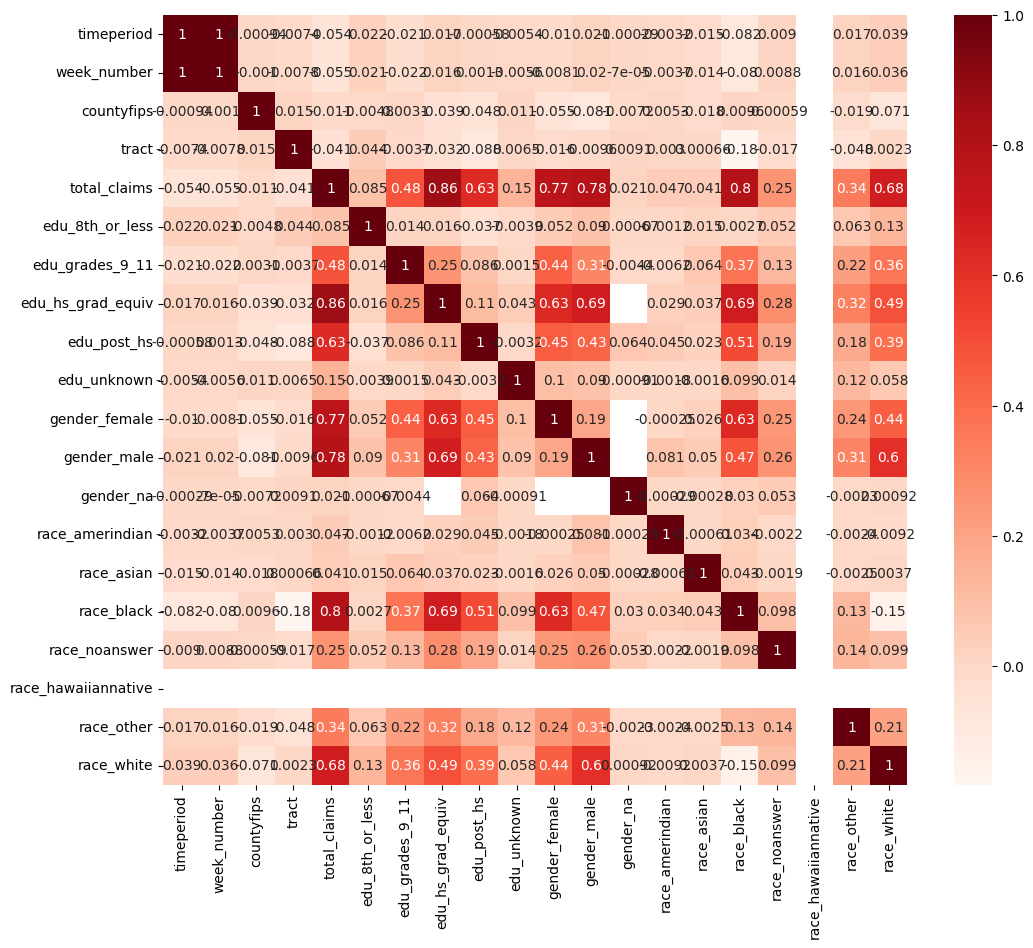

In [14]:
plt.figure(figsize=(12,10))
cor = unemployment_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
#Correlation with output variable
cor_target = abs(cor["total_claims"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)

total_claims         1.000000
edu_hs_grad_equiv    0.863481
edu_post_hs          0.629552
gender_female        0.767174
gender_male          0.783093
race_black           0.795195
race_white           0.683659
Name: total_claims, dtype: float64


In [16]:
unemployment_data = unemployment_data.set_index('timeperiod')

In [17]:
X = unemployment_data.drop(["uu_id", "weak_number"], axis=1)
X_cor = unemployment_data[["edu_hs_grad_equiv", "edu_post_hs",
                           "gender_female", "gender_male",
                           "race_black", "race_white"]]
y = unemployment_data["total_claims"]

KeyError: "['weak_number'] not found in axis"

In [18]:
X = unemployment_data.drop(["uu_id", "week_number"], axis=1)
X_cor = unemployment_data[["edu_hs_grad_equiv", "edu_post_hs",
                           "gender_female", "gender_male",
                           "race_black", "race_white"]]
y = unemployment_data["total_claims"]

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

ValueError: could not convert string to float: 'Census Tract 9, Allen County, Indiana'

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_cor,y)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [21]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit_transform(X_cor, y)

array([[ 14.        ,  16.92359827,  18.9577575 ,  19.68913762,
         11.        ,  17.31273467],
       [108.        ,  16.92359827,  76.        ,  35.        ,
         10.7380685 ,   0.        ],
       [ 19.3195825 ,  16.92359827,  18.9577575 ,  19.68913762,
         39.        ,   0.        ],
       ...,
       [ 13.        ,  16.92359827,  18.9577575 ,  19.68913762,
         10.7380685 ,  17.31273467],
       [ 48.        ,  16.92359827,  18.9577575 ,  19.68913762,
         10.7380685 ,  17.31273467],
       [ 18.        ,  16.92359827,  11.        ,  13.        ,
         10.7380685 ,  17.31273467]])

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_cor,y)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [23]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit_transform(X_cor)

array([[ 14.        ,  16.92359827,  18.9577575 ,  19.68913762,
         11.        ,  17.31273467],
       [108.        ,  16.92359827,  76.        ,  35.        ,
         10.7380685 ,   0.        ],
       [ 19.3195825 ,  16.92359827,  18.9577575 ,  19.68913762,
         39.        ,   0.        ],
       ...,
       [ 13.        ,  16.92359827,  18.9577575 ,  19.68913762,
         10.7380685 ,  17.31273467],
       [ 48.        ,  16.92359827,  18.9577575 ,  19.68913762,
         10.7380685 ,  17.31273467],
       [ 18.        ,  16.92359827,  11.        ,  13.        ,
         10.7380685 ,  17.31273467]])

In [24]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_cor = imp.fit_transform(X_cor)

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_cor,y)

LinearRegression()

In [26]:
y_pred = pd.Series(model.predict(X), index=X.index)

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Census Tract 9, Allen County, Indiana'

In [27]:
y_pred = pd.Series(model.predict(X_xor), index=X_cor.index)

NameError: name 'X_xor' is not defined

In [28]:
y_pred = pd.Series(model.predict(X_cor), index=X_cor.index)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [29]:
y_pred = pd.Series(model.predict(X_cor))

In [30]:
# y_pred = pd.Series(model.predict(X_cor), index=X_cor.index)
y_pred = pd.Series(model.predict(X_cor))

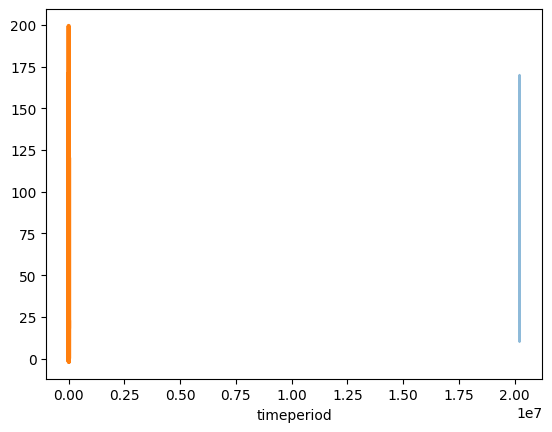

In [31]:
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)

In [32]:
y_pred = pd.Series(model.predict(X_cor), index=X.index)
# y_pred = pd.Series(model.predict(X_cor))

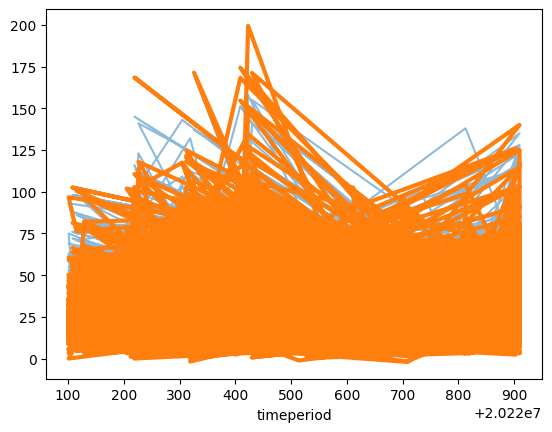

In [33]:
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)

In [34]:
X = unemployment_data.drop(["uu_id", "week_number"], axis=1)
X_cor = unemployment_data[["uu_id", "week_number"
                           "edu_hs_grad_equiv", "edu_post_hs",
                           "gender_female", "gender_male",
                           "race_black", "race_white"]]
y = unemployment_data["total_claims"]

KeyError: "['week_numberedu_hs_grad_equiv'] not in index"

In [35]:
y_pred = pd.Series(model.predict(X_cor), index=X.index)

In [36]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X = enc.fit_transform(data["uu_id", "tract_name",
                           "top_category_employer1",
                           "top_category_employer2",
                           "top_category_employer3"])

NameError: name 'data' is not defined

In [37]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X = enc.fit_transform(unemployment_data["uu_id", "tract_name",
                           "top_category_employer1",
                           "top_category_employer2",
                           "top_category_employer3"])

KeyError: ('uu_id', 'tract_name', 'top_category_employer1', 'top_category_employer2', 'top_category_employer3')

In [38]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X = enc.fit_transform(unemployment_data[["uu_id", "tract_name",
                           "top_category_employer1",
                           "top_category_employer2",
                           "top_category_employer3"]])

In [39]:
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

AttributeError: corr not found

<Figure size 1200x1000 with 0 Axes>

In [40]:
plt.figure(figsize=(12,10))
cor = pd.dataFrame(X).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

AttributeError: module 'pandas' has no attribute 'dataFrame'

<Figure size 1200x1000 with 0 Axes>

In [41]:
plt.figure(figsize=(12,10))
cor = pd.dataframe(X).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

AttributeError: module 'pandas' has no attribute 'dataframe'

<Figure size 1200x1000 with 0 Axes>

In [42]:
plt.figure(figsize=(12,10))
cor = pd.DataFrame(X).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_19127/3922088918.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = pd.DataFrame(X).corr()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x1000 with 0 Axes>

In [43]:
X = pd.get_dummies(df, prefix=['col1', 'col2'])

NameError: name 'df' is not defined

In [44]:
X = pd.get_dummies(unemployment_data, prefix=['col1', 'col2'])

ValueError: Length of 'prefix' (2) did not match the length of the columns being encoded (5).

In [45]:
X = pd.get_dummies(unemployment_data)

In [46]:
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

KeyboardInterrupt: 